In [21]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# data directory
DATA_DIR = os.path.join('..', 'data')

In [22]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C_hhold_test.csv')}}

In [33]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [34]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


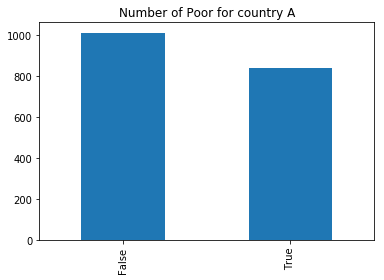

In [35]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

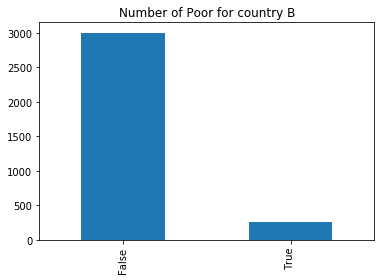

In [36]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

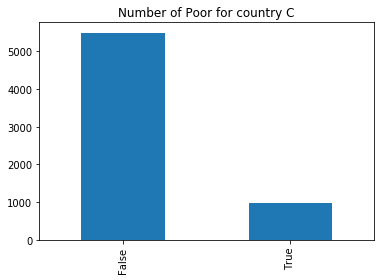

In [37]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [38]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)

    return df

In [39]:
print("Country A")
aX_train = pre_process_data(a_train.drop('poor', axis=1))
a_train.fillna(False, inplace=True)
ay_train = np.ravel(a_train.poor.astype(int))

print("\nCountry B")
bX_train = pre_process_data(b_train.drop('poor', axis=1))
b_train.fillna(False, inplace=True)
by_train = np.ravel(b_train.poor.astype(int))

print("\nCountry C")
cX_train = pre_process_data(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor.astype(int))

Country A
Input shape:	(1855, 344)
After standardization (1855, 344)
After converting categoricals:	(1855, 849)

Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)


In [40]:
from sklearn.ensemble import RandomForestClassifier

def train_model(features, labels, **kwargs):
    
    # instantiate model
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print(f"In-sample accuracy: {accuracy:0.2%}")
    
    return model

In [41]:
model_a = train_model(aX_train, ay_train)
model_b = train_model(bX_train, by_train)
model_c = train_model(cX_train, cy_train)

In-sample accuracy: 100.00%
In-sample accuracy: 99.94%
In-sample accuracy: 100.00%


In [42]:
# load test data
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [43]:
# process the test data
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [44]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [45]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [46]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [47]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [49]:
submission.to_csv('submission.csv')